In [228]:
# Problem Statement
# The many millions of teenage consumers using social networking sites have attracted the attention of marketers
#struggling to find an edge in an increasingly competitive market. One way to gain this edge i`xs to identify segments of teenagers who share similar tastes,
#so that clients can avoid targeting advertisements to teens with no interest in the product being sold.
# Build K-means clustering model to classify the interest of teenagers by using various attributes.

# Data Description
# The SNS dataset contains 30000 observations (rows) each represents a high school student and 40 features (columns) that provides information for the student.
import pandas as pd
sns=pd.read_csv(r"C:\Users\rks91\Downloads\New folder\snsdata.csv")

In [7]:
sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [229]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [9]:
sns.shape

(30000, 40)

In [231]:
sns.head(20)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
5,2006,F,NaN,142,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
6,2006,F,18.930,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0
7,2006,M,18.322,17,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2006,F,19.055,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2006,F,18.708,39,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,6,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0


In [232]:
sns.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [233]:
sns.age=sns.age.fillna(sns.age.median())

In [234]:
sns.gender.value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [235]:
sns.gender=sns.gender.fillna("F")

In [236]:
sns.gender=sns.gender.replace({"F":1,"M":0})

In [237]:
sns.gender.value_counts()

1    24778
0     5222
Name: gender, dtype: int64

In [238]:
from sklearn.cluster import KMeans#required import

In [99]:
kmeans_sns=KMeans(n_clusters=6)#value of K

In [100]:
kmeans_sns.fit(sns)#model is created at this line

KMeans(n_clusters=6)

In [64]:
kmeans_sns.labels_

array([3, 3, 2, ..., 3, 3, 3])

In [60]:
list(kmeans_sns.labels_)

[3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 0,
 0,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 0,
 0,
 2,
 0,
 3,
 3,
 2,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 3,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 2,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 0,
 2,
 3,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 0,
 3,
 0,
 3,
 0,
 3,
 3,
 1,
 2,
 3,
 3,
 0,
 0,
 2,
 0,
 3,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 2,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 0,
 2,
 2,
 3,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 3,
 2,
 0,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 1,
 2,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 0,
 3,
 2,
 0,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 0,


In [58]:
len(kmeans_sns.labels_)

30000

In [36]:
import numpy as np

In [59]:
np.unique(kmeans_sns.labels_)

array([0, 1, 2, 3])

In [65]:
l1=list(kmeans_sns.labels_)

In [66]:
l1.count(0)

9628

In [67]:
l1.count(1)

557

In [68]:
l1.count(2)

3704

In [69]:
l1.count(3)

16111

In [70]:
#to check the centroids

In [71]:
kmeans_sns.cluster_centers_

array([[2.00753563e+03, 8.33298712e-01, 1.77613656e+01, 3.89027835e+01,
        3.04840050e-01, 2.71915247e-01, 2.44287495e-01, 1.93290403e-01,
        1.72725384e-01, 1.55276278e-01, 1.10926464e-01, 1.12380557e-01,
        9.32696302e-02, 1.54756959e-01, 3.59783963e-01, 2.21333610e-01,
        1.45201496e-01, 1.38450353e-01, 1.12588284e-01, 4.70502700e-01,
        3.39426672e-01, 4.80889074e-02, 8.07644371e-01, 2.68799335e-01,
        5.02077275e-01, 2.73161612e-01, 1.24740341e-01, 2.24345658e-02,
        4.41940174e-01, 1.24428749e-01, 1.23909431e-01, 2.74200249e-01,
        3.88346489e-01, 1.59950145e-01, 7.81055256e-02, 5.60864146e-02,
        1.93186539e-01, 1.27233070e-01, 8.74532613e-02, 5.80598255e-02],
       [2.00778276e+03, 9.31777379e-01, 1.75600144e+01, 1.85050269e+02,
        4.02154399e-01, 3.05206463e-01, 2.60323160e-01, 2.33393178e-01,
        2.29802513e-01, 1.75942549e-01, 1.90305206e-01, 1.18491921e-01,
        1.05924596e-01, 1.38240575e-01, 5.24236984e-01, 2.49551

In [72]:
len(kmeans_sns.cluster_centers_)

4

In [73]:
df_of_centroids=pd.DataFrame(kmeans_sns.cluster_centers_)

In [ ]:
#df_of_centroids

In [75]:
df_of_centroids.columns=sns.columns

In [76]:
df_of_centroids#each row is a centroid (point) consisting of 40 co-ordinates

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.535625,0.833299,17.761366,38.902784,0.304840,0.271915,0.244287,0.193290,0.172725,0.155276,0.110926,0.112381,0.093270,0.154757,0.359784,0.221334,0.145201,0.138450,0.112588,0.470503,0.339427,0.048089,0.807644,0.268799,0.502077,0.273162,0.124740,0.022435,0.441940,0.124429,0.123909,0.274200,0.388346,0.159950,0.078106,0.056086,0.193187,0.127233,0.087453,0.058060
1,2007.782765,0.931777,17.560014,185.050269,0.402154,0.305206,0.260323,0.233393,0.229803,0.175943,0.190305,0.118492,0.105925,0.138241,0.524237,0.249551,0.199282,0.204668,0.138241,0.628366,0.328546,0.052065,0.850987,0.236984,0.644524,0.321364,0.123878,0.016158,0.594255,0.179533,0.147217,0.407540,0.533214,0.193896,0.149013,0.116697,0.204668,0.143627,0.125673,0.064632
2,2007.626620,0.871760,17.745129,85.492981,0.326404,0.282397,0.282397,0.238661,0.180076,0.144708,0.160367,0.134719,0.092873,0.147138,0.407127,0.173056,0.169006,0.159827,0.104752,0.510799,0.292117,0.040497,0.739201,0.255400,0.572084,0.353672,0.154428,0.028618,0.455184,0.128780,0.103402,0.343683,0.455724,0.163337,0.102052,0.075054,0.175756,0.124460,0.098812,0.052106
3,2007.439824,0.807337,17.981977,6.895227,0.226677,0.231829,0.194898,0.121718,0.113959,0.118118,0.088821,0.093166,0.081870,0.129539,0.274471,0.209236,0.130408,0.109180,0.096021,0.371361,0.276519,0.035752,0.691888,0.225560,0.412575,0.206443,0.094345,0.019179,0.397554,0.096456,0.081311,0.222270,0.302030,0.136677,0.054807,0.040469,0.179877,0.103097,0.084476,0.063621


In [77]:
#till now I had just taken the value of n cluster as 4 but lets find the value of K
kmeans_sns.score(sns)
#only thing to keep in mind is that it has the - sign so u need to remove the -ve sign

-8115725.044630924

In [ ]:
np.absolute(kmeans_sns.score(sns))

In [ ]:
##take not more than 7 mins and write the code for elbow plot

In [83]:
empty_list=[]
num=list(range(1,20))
for k in range(1,20):
    kmeans_sns=KMeans(n_clusters=k)
    kmeans_sns.fit(sns)
    Acc=(-1*kmeans_sns.score(sns))
#     knn=KNeighborsClassifier(n_neighbors=k)
#     knn.fit(cr_train_x,cr_train_y)
#     knn_pred=knn.predict(cr_test_x)
#     tab_knn=confusion_matrix(knn_pred,cr_test_y)
#     Acc=tab_knn.diagonal().sum()*100/tab_knn.sum()
#     Acc=np.round(Acc,2)
    empty_list.append(Acc)
    

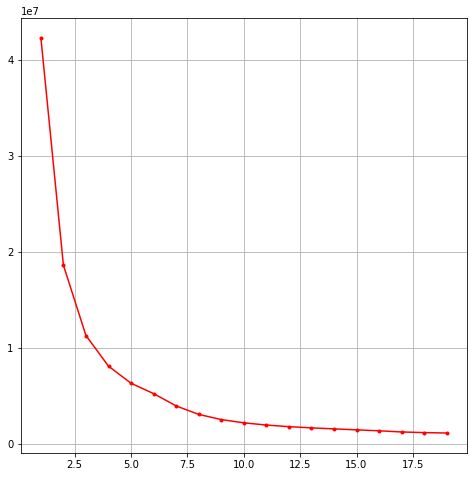

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(num,empty_list,color="r",marker=".")
plt.grid()

In [86]:
empty_list=[]
num=list(range(1,20))
for k in range(1,20):
    kmeans_sns=KMeans(n_clusters=k)
    kmeans_sns.fit(sns)
    empty_list.append(kmeans_sns.score(sns))

In [87]:
empty_list=np.round(np.absolute(empty_list))

In [88]:
empty_list

array([42277086., 18613483., 11300784.,  8113648.,  6335835.,  5064154.,
        3971722.,  3108247.,  2554056.,  2218587.,  1990625.,  1842929.,
        1699358.,  1590718.,  1474819.,  1392055.,  1316099.,  1214744.,
        1170781.])

In [89]:
num=list(range(1,20))
num

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Text(0.5, 1.0, 'Elbow Plot on SNS data')

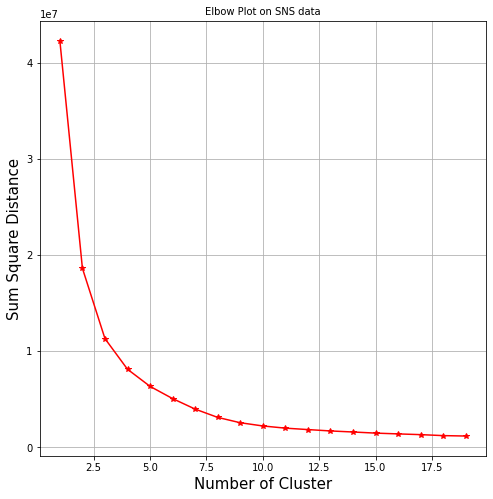

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(num,empty_list,marker="*",color="r")
plt.grid()
plt.xlabel("Number of Cluster",size=15)
plt.ylabel("Sum Square Distance",size=15)
plt.title("Elbow Plot on SNS data",size=10)

In [91]:
empty_list

array([42277086., 18613483., 11300784.,  8113648.,  6335835.,  5064154.,
        3971722.,  3108247.,  2554056.,  2218587.,  1990625.,  1842929.,
        1699358.,  1590718.,  1474819.,  1392055.,  1316099.,  1214744.,
        1170781.])

In [93]:
(42277086.-18613483)/42277086.#2

0.5597264437761865

In [94]:
(18613483.- 11300784.)/18613483.#3

0.39287107093282864

In [95]:
(11300784.- 8113648.)/ 11300784.#4

0.28202786638519944

In [97]:
(8113648.-6335835.)/ 8113648.#5

0.21911389303553716

In [98]:
(6335835.-5064154.)/6335835.#6

0.2007124554222135

In [161]:
(5064154.-3971722.)/5064154.#7

0.21571855832188358

In [162]:
(3971722.-3108247.)/3971722.#8

0.21740569959327466

In [163]:
(3108247.-2554056)/3108247.#9

0.17829696288615415

In [164]:
(2554056-2218587)/2554056#10

0.13134755071932644

In [165]:
(2218587-1990625)/2218587#11

0.10275098519913801

In [166]:
(1990625-1842929)/1990625

0.07419579277864992

In [ ]:
#there is bit of fight betwn 5 and 6
#I am choosing 6

In [239]:
kmeans_sns=KMeans(n_clusters=6)
kmeans_sns.fit(sns)
df_of_centroids=pd.DataFrame(kmeans_sns.cluster_centers_)
df_of_centroids.columns=sns.columns
df_of_centroids

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.503261,0.823701,17.283396,31.612548,0.289971,0.267034,0.240612,0.166742,0.166629,0.149427,0.109175,0.109400,0.092984,0.154823,0.339330,0.213627,0.142343,0.131774,0.105914,0.462222,0.338993,0.045199,0.798066,0.257027,0.477850,0.260625,0.118844,0.023162,0.436699,0.118394,0.119856,0.266697,0.375197,0.156735,0.069597,0.048909,0.195300,0.125141,0.090848,0.056555
1,2007.435759,0.807069,17.350559,5.419265,0.223770,0.229938,0.191407,0.121830,0.108870,0.115038,0.086001,0.091961,0.080596,0.127928,0.272765,0.206376,0.127581,0.108593,0.096258,0.362370,0.270132,0.035620,0.680457,0.220998,0.409841,0.200347,0.090229,0.018295,0.396258,0.095773,0.080942,0.218018,0.297713,0.135482,0.054747,0.040194,0.176923,0.101663,0.084200,0.064449
2,2007.676451,0.902602,17.406173,120.196798,0.382922,0.302869,0.266845,0.268179,0.200133,0.147432,0.202802,0.132755,0.094063,0.144763,0.468979,0.214143,0.182789,0.197465,0.108072,0.603736,0.300200,0.042695,0.796531,0.256838,0.654436,0.392929,0.165444,0.031354,0.511674,0.152101,0.126751,0.419613,0.489660,0.165444,0.124083,0.083389,0.202135,0.133422,0.110073,0.054703
3,2007.612458,0.860786,17.233054,65.542851,0.322533,0.280727,0.268604,0.237876,0.183528,0.157191,0.134197,0.127717,0.094064,0.150293,0.395067,0.209657,0.164507,0.149875,0.117057,0.492475,0.312291,0.045569,0.781145,0.280309,0.544105,0.315844,0.145694,0.024666,0.442935,0.129808,0.105769,0.307901,0.434992,0.169105,0.097408,0.074833,0.176630,0.123955,0.086120,0.058319
4,2007.692308,0.928205,17.583051,242.738462,0.302564,0.251282,0.276923,0.200000,0.215385,0.205128,0.174359,0.133333,0.076923,0.128205,0.441026,0.189744,0.215385,0.158974,0.148718,0.451282,0.338462,0.061538,0.661538,0.200000,0.594872,0.292308,0.087179,0.005128,0.630769,0.174359,0.128205,0.312821,0.553846,0.179487,0.123077,0.158974,0.189744,0.153846,0.117949,0.046154
5,2007.792929,0.777778,101.880652,25.030303,0.181818,0.151515,0.212121,0.080808,0.106061,0.151515,0.035354,0.060606,0.121212,0.075758,0.267677,0.217172,0.131313,0.075758,0.070707,0.333333,0.328283,0.040404,0.797980,0.303030,0.479798,0.398990,0.207071,0.020202,0.333333,0.055556,0.065657,0.202020,0.171717,0.070707,0.055556,0.030303,0.242424,0.121212,0.080808,0.050505


In [102]:
#create 
#to run a campaign Cx needs to know in which cluster each individual falls

In [240]:
person_cluster=pd.concat([sns,pd.Series(kmeans_sns.labels_)],axis=1)

In [241]:
person_cluster.head(30)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,0
0,2006,0,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2006,1,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1
2,2006,0,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
3,2006,1,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2006,1,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,1
5,2006,1,17.287,142,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,2
6,2006,1,18.930,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,3
7,2006,0,18.322,17,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,2006,1,19.055,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
9,2006,1,18.708,39,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,6,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [242]:
person_cluster.rename(columns={person_cluster.columns[-1]:"cluster_number"},inplace=True)

In [243]:
person_cluster=person_cluster.sort_values('cluster_number')

In [244]:
person_cluster.head(200)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_number
22591,2009,1,16.293,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0
21542,2008,1,16.435,31,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21540,2008,1,16.402,39,0,2,0,0,0,0,0,0,0,0,1,0,4,0,0,0,5,3,5,3,0,0,0,0,1,1,0,0,1,1,0,0,5,0,0,0,0
21539,2008,1,17.287,29,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8919,2007,1,17.339,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
8921,2007,0,17.049,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8922,2007,0,17.821,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8924,2007,1,18.067,31,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21534,2008,0,16.435,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8910,2007,1,17.199,34,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,1,0,2,0,1,0,0,0,1,0,1,1,1,0,0,0,2,0,0,0,0


In [245]:
person_cluster.cluster_number.value_counts()

1    14430
0     8894
3     4784
2     1499
5      198
4      195
Name: cluster_number, dtype: int64

In [246]:
kmeans_sns.labels_

array([1, 1, 3, ..., 1, 1, 1])

<BarContainer object of 6 artists>

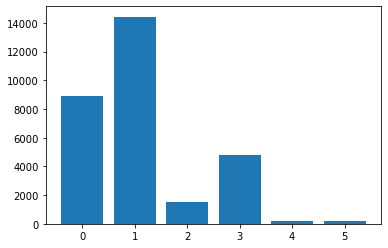

In [247]:
import matplotlib.pyplot as plt
num=[1,0,3,2,5,4]
person_cluster.cluster_number.value_counts()
plt.bar(num,person_cluster.cluster_number.value_counts())

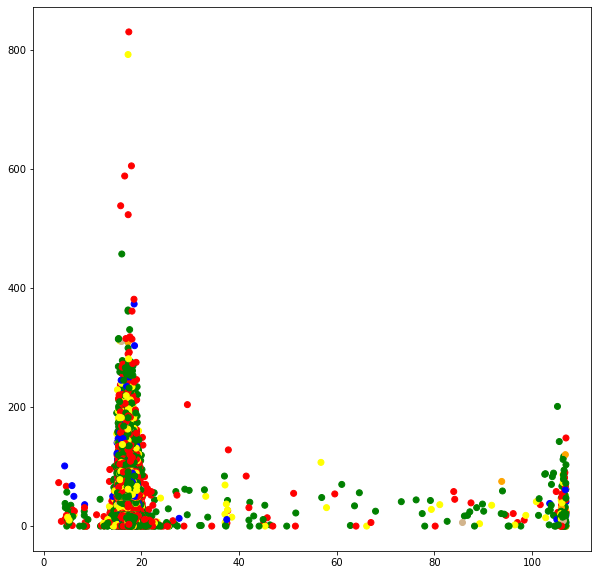

In [256]:
plt.figure(figsize=(10,10))
cmap=np.array(['red','green','blue','yellow','tan','orange'])
#plt.plot(person_cluster.age,person_cluster.friends,"*",colors=cmap)
plt.scatter(person_cluster.age,person_cluster.friends,c=cmap[kmeans_sns.labels_])#"*",colors=cmap)

In [170]:
mall=pd.read_csv(r"C:\Users\rks91\Downloads\New folder\mall_kmeans.csv")

In [171]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [153]:
mall.shape

(200, 5)

In [172]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [173]:
mall.Genre=mall.Genre.replace({"Female":1,"Male":0})

In [174]:
from sklearn.cluster import KMeans
empty_list=[]
num=list(range(1,20))
for k in range(1,20):
    kmeans_mall=KMeans(n_clusters=k)
    kmeans_mall.fit(mall)
    Acc=(kmeans_mall.score(mall))
    empty_list.append(Acc*(-1))

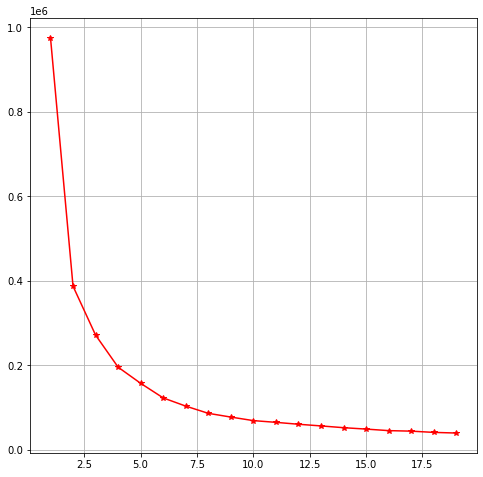

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(num,empty_list,color="r",marker="*")
plt.grid()

In [177]:
empty_list

[975512.06,
 387065.7137713772,
 271396.5629660314,
 195401.19855991477,
 157179.69335773907,
 122630.44175335612,
 103233.01724386723,
 86146.21762410297,
 77284.40407098943,
 68900.88594790665,
 64818.57650966181,
 60276.3452627225,
 56332.77610754829,
 52149.70166843391,
 48836.91953601953,
 45204.80368232132,
 43960.40048701299,
 41018.96046176046,
 39502.15422355421]

In [ ]:
#program for (change percentage) for every iteration???

In [192]:
hi=[]
for i in range(0,18):
    oh=((empty_list[i]-empty_list[i+1])/empty_list[i])
    hi.append(oh)
    hi.append(i+2)

In [193]:
hi

[0.603217910221041,
 2,
 0.29883595133839874,
 3,
 0.2800159426323625,
 4,
 0.19560527511532153,
 5,
 0.219807348305161,
 6,
 0.15817788986280013,
 7,
 0.16551680921424722,
 8,
 0.10286944450401588,
 9,
 0.1084761954738258,
 10,
 0.05924901228891762,
 11,
 0.07007607219301172,
 12,
 0.06542482192617408,
 13,
 0.07425649378841587,
 14,
 0.06352446948741798,
 15,
 0.07437233732605421,
 16,
 0.027528118561324335,
 17,
 0.06691112894027218,
 18,
 0.03697817353563305,
 19]

In [159]:
(975512.06-387065.7137713772)/975512.06

0.603217910221041

In [160]:
(387065.7137713772-271396.5629660314)/387065.7137713772

0.29883595133839874

In [194]:
(271396.5629660314-)/271396.5629660314

SyntaxError: invalid syntax (<ipython-input-194-c5c999e514c0>, line 1)

In [198]:
# kmeans_mall=KMeans(n_clusters=6)
# kmeans_sns.fit(sns)
# df_of_centroids=pd.DataFrame(kmeans_sns.cluster_centers_)
# df_of_centroids.columns=sns.columns
# df_of_centroids
kmeans_mall=KMeans(n_clusters=3)
kmeans_mall.fit(mall)
df_of_centroids=pd.DataFrame(kmeans_sns.cluster_centers_)
df_of_centroids.columns=sns.columns
df_of_centroids

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,66.452381,0.571429,45.261905,47.904762,50.904762
1,166.823529,0.558824,32.264706,88.882353,82.764706
2,109.750000,0.590909,39.363636,63.954545,51.159091
3,23.000000,0.608696,45.217391,26.304348,20.913043
4,164.885714,0.457143,41.257143,88.371429,17.428571
5,23.090909,0.590909,25.272727,25.727273,79.363636


In [199]:
kmeans_mall.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [200]:
list(kmeans_mall.labels_)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [201]:
len(kmeans_mall.labels_)

200

In [202]:
np.unique(kmeans_mall.labels_)

array([0, 1, 2])

In [205]:
l2=list(kmeans_mall.labels_)

In [206]:
l2.count(0)

68

In [207]:
l2.count(1)

61

In [208]:
l2.count(2)

71

In [210]:
kmeans_mall.cluster_centers_

array([[166.5       ,   0.54411765,  36.04411765,  88.91176471,
         50.20588235],
       [ 31.01639344,   0.60655738,  36.91803279,  30.36065574,
         49.73770492],
       [ 96.98591549,   0.53521127,  43.1971831 ,  59.35211268,
         50.5915493 ]])

In [211]:
len(kmeans_mall.cluster_centers_)

3

In [212]:
df_of_centroids=pd.DataFrame(kmeans_mall.cluster_centers_)

In [213]:
df_of_centroids.columns=mall.columns

In [214]:
df_of_centroids

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,166.500000,0.544118,36.044118,88.911765,50.205882
1,31.016393,0.606557,36.918033,30.360656,49.737705
2,96.985915,0.535211,43.197183,59.352113,50.591549


In [216]:
kmeans_mall.score(mall)

-271396.5629660314

In [217]:
cx_cluster=pd.concat([mall,pd.Series(kmeans_mall.labels_)],axis=1)
cx_cluster

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,1
5,6,1,22,17,76,1
6,7,1,35,18,6,1
7,8,1,23,18,94,1
8,9,0,64,19,3,1
9,10,1,30,19,72,1


In [258]:
cx_cluster.rename(columns={cx_cluster.columns[-1]:"cluster_number"},inplace=True)

In [259]:
cx_cluster=cx_cluster.sort_values('cluster_number')
cx_cluster

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_number
199,200,0,30,137,83,0
162,163,0,19,81,5,0
161,162,1,29,79,83,0
160,161,1,56,79,35,0
159,160,1,30,78,73,0
158,159,0,34,78,1,0
157,158,1,30,78,78,0
156,157,0,37,78,1,0
155,156,1,27,78,89,0
154,155,1,47,78,16,0


In [260]:
cx_cluster.cluster_number.value_counts()

2    71
0    68
1    61
Name: cluster_number, dtype: int64

In [261]:
kmeans_mall.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

<BarContainer object of 3 artists>

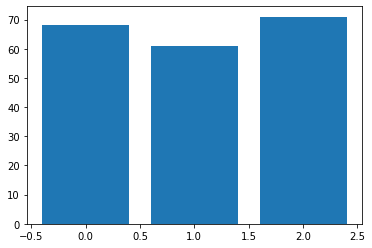

In [264]:
num=[2,0,1]
#cx_cluster.cluster_number.value_counts()
plt.bar(num,cx_cluster.cluster_number.value_counts())